<a href="https://colab.research.google.com/github/sailahari29/sailahari29/blob/main/Chennai_House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chennai House Price Prediction**

**Problem Statement**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?
Data

**Minimum Requirements**

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [2]:
df=pd.read_csv("/content/train-chennai-sale.csv")
df

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0     P03210  Karapakkam      1004  04-05-2011            131        1.0   
1     P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2     P01812       Adyar       909  04-02-2012             70        1.0   
3     P05346   Velachery      1855  13-03-2010             14        3.0   
4     P06210  Karapakkam      1226  05-10-2009             84        1.0   
...      ...         ...       ...         ...            ...        ...   
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
0            1.0       3     AbNormal        Yes  ...        AllPub   
1            1.0       5     AbNormal         No  ...        AllPub   
2            1.0       3     AbNormal        Yes  ...           ELO   
3            2.0       5       Family         No  ...       NoSewr    
4            1.0       3     AbNormal        Yes  ...        AllPub   
...          ...     ...          ...        ...  ...           ...   
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
0         Paved      A      4.0         3.9         4.9       4.330   380000   
1        Gravel     RH      4.9         4.2         2.5       3.765   760122   
2        Gravel     RL      4.1         3.8         2.2       3.090   421094   
3         Paved      I      4.7         3.9         3.6       4.010   356321   
4        Gravel      C      3.0         2.5         4.1       3.290   237000   
...         ...    ...      ...         ...         ...         ...      ...   
7104  No Access     RM      3.0         2.2         2.4       2.520   208767   
7105  No Access     RH      3.6         4.5         3.3       3.920   346191   
7106     Gravel      I      4.3         4.2         2.9       3.840   317354   
7107      Paved     RL      4.6         3.8         4.1       4.160   425350   
7108      Paved      I      3.1         3.5         4.3       3.640   349177   

      COMMIS  SALES_PRICE  
0     144400      7600000  
1     304049     21717770  
2      92114     13159200  
3      77042      9630290  
4      74063      7406250  
...      ...          ...  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[7109 rows x 22 columns]

**Observation**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
print("The original dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The original dataset has 7109 rows and 22 columns


In [5]:
df.shape

(7109, 22)

**Describe Function**

In [6]:
df.describe()

INT_SQFT  DIST_MAINROAD    N_BEDROOM   N_BATHROOM       N_ROOM  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              COMMIS   SALES_PRICE  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

In [7]:
df.describe(include='all')

PRT_ID      AREA     INT_SQFT   DATE_SALE  DIST_MAINROAD    N_BEDROOM  \
count     7109      7109  7109.000000        7109    7109.000000  7108.000000   
unique    7109        17          NaN        2798            NaN          NaN   
top     P03210  Chrompet          NaN  06-10-2009            NaN          NaN   
freq         1      1681          NaN          12            NaN          NaN   
mean       NaN       NaN  1382.073006         NaN      99.603179     1.637029   
std        NaN       NaN   457.410902         NaN      57.403110     0.802902   
min        NaN       NaN   500.000000         NaN       0.000000     1.000000   
25%        NaN       NaN   993.000000         NaN      50.000000     1.000000   
50%        NaN       NaN  1373.000000         NaN      99.000000     1.000000   
75%        NaN       NaN  1744.000000         NaN     148.000000     2.000000   
max        NaN       NaN  2500.000000         NaN     200.000000     4.000000   

         N_BATHROOM       N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
count   7104.000000  7109.000000      7109       7109  ...          7109   
unique          NaN          NaN         9          3  ...             5   
top             NaN          NaN   AdjLand        Yes  ...        AllPub   
freq            NaN          NaN      1433       3587  ...          1886   
mean       1.213260     3.688704       NaN        NaN  ...           NaN   
std        0.409639     1.019099       NaN        NaN  ...           NaN   
min        1.000000     2.000000       NaN        NaN  ...           NaN   
25%        1.000000     3.000000       NaN        NaN  ...           NaN   
50%        1.000000     4.000000       NaN        NaN  ...           NaN   
75%        1.000000     4.000000       NaN        NaN  ...           NaN   
max        2.000000     6.000000       NaN        NaN  ...           NaN   

       STREET MZZONE     QS_ROOMS  QS_BATHROOM   QS_BEDROOM   QS_OVERALL  \
count    7109   7109  7109.000000  7109.000000  7109.000000  7061.000000   
unique      5      6          NaN          NaN          NaN          NaN   
top     Paved     RL          NaN          NaN          NaN          NaN   
freq     2560   1858          NaN          NaN          NaN          NaN   
mean      NaN    NaN     3.517471     3.507244     3.485300     3.503254   
std       NaN    NaN     0.891972     0.897834     0.887266     0.527223   
min       NaN    NaN     2.000000     2.000000     2.000000     2.000000   
25%       NaN    NaN     2.700000     2.700000     2.700000     3.130000   
50%       NaN    NaN     3.500000     3.500000     3.500000     3.500000   
75%       NaN    NaN     4.300000     4.300000     4.300000     3.890000   
max       NaN    NaN     5.000000     5.000000     5.000000     4.970000   

              REG_FEE         COMMIS   SALES_PRICE  
count     7109.000000    7109.000000  7.109000e+03  
unique            NaN            NaN           NaN  
top               NaN            NaN           NaN  
freq              NaN            NaN           NaN  
mean    376938.330708  141005.726544  1.089491e+07  
std     143070.662010   78768.093718  3.768603e+06  
min      71177.000000    5055.000000  2.156875e+06  
25%     272406.000000   84219.000000  8.272100e+06  
50%     349486.000000  127628.000000  1.033505e+07  
75%     451562.000000  184506.000000  1.299390e+07  
max     983922.000000  495405.000000  2.366734e+07  

[11 rows x 22 columns]

**DATA TYPES**

In [8]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [9]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
temp

data_type  null_count  unique_count
PRT_ID           object           0          7109
AREA             object           0            17
INT_SQFT          int64           0          1699
DATE_SALE        object           0          2798
DIST_MAINROAD     int64           0           201
N_BEDROOM       float64           1             4
N_BATHROOM      float64           5             2
N_ROOM            int64           0             5
SALE_COND        object           0             9
PARK_FACIL       object           0             3
DATE_BUILD       object           0          5808
BUILDTYPE        object           0             5
UTILITY_AVAIL    object           0             5
STREET           object           0             5
MZZONE           object           0             6
QS_ROOMS        float64           0            31
QS_BATHROOM     float64           0            31
QS_BEDROOM      float64           0            31
QS_OVERALL      float64          48           479
REG_FEE           int64           0          7038
COMMIS            int64           0          7011
SALES_PRICE       int64           0          7057

**NULL VALUES**

In [10]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**BEDROOM SIZE IN SQFT**

In [11]:
print(df.loc[df['N_BEDROOM'].isnull(),'INT_SQFT'])
print('\n Lets find the average area for different bhk')
print(df[['N_BEDROOM','INT_SQFT']].groupby('N_BEDROOM').mean())
print(" It is close to 2bhk")
df['N_BEDROOM'].fillna(2,inplace=True)

4060    1556
Name: INT_SQFT, dtype: int64

 Lets find the average area for different bhk
              INT_SQFT
N_BEDROOM             
1.0        1078.015283
2.0        1596.548044
3.0        1947.609618
4.0        2364.141732
 It is close to 2bhk


**AREA VALUES**

In [12]:
df['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

**AREA NAME CORRECTION**

In [13]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [14]:
df['AREA'] = df['AREA'].replace("Karapakam","Karapakkam")
df['AREA'] = df['AREA'].replace(["Ana Nagar","Ann Nagar","Anna Nagar"],"AnnaNagar")
df['AREA'] = df['AREA'].replace("Adyr","Adyar")
df['AREA'] = df['AREA'].replace('Velchery','Velachery')
df['AREA'] = df['AREA'].replace(['Chrompet','Chormpet','Chrompt','Chrmpet'],'Chromepet')
df['AREA'] = df['AREA'].replace("KK Nagar",'KKNagar')
df['AREA'] = df['AREA'].replace("T Nagar","TNagar")

In [15]:
df['AREA'].unique()

array(['Karapakkam', 'AnnaNagar', 'Adyar', 'Velachery', 'Chromepet',
       'KKNagar', 'TNagar'], dtype=object)

**CORRECTION MADE BASED ON CORRECT NAME FORMATS**

In [16]:
df['AREA'].value_counts()

Chromepet     1702
Karapakkam    1366
KKNagar        997
Velachery      981
AnnaNagar      788
Adyar          774
TNagar         501
Name: AREA, dtype: int64

**Exploratory Data Analysis**

**DATA VISUALIZATION**

**COUNTPLOT**

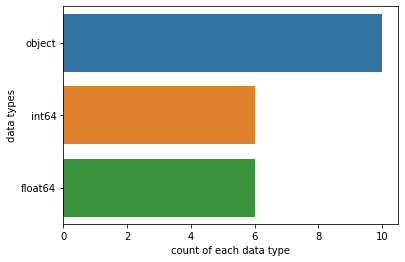

In [17]:
sns.countplot(y=df.dtypes ,data=df)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

**Datasets contain more object data types**

**BARPLOT**

In [18]:
a1=df['AREA'].groupby(df['STREET']).count()

In [19]:
a2= df['AREA'].groupby(df['PARK_FACIL']).count()
a3=df['AREA'].groupby(df['BUILDTYPE']).count()
a4 = df['AREA'].groupby(df['MZZONE']).count()
a5= df['AREA'].groupby(df['UTILITY_AVAIL']).count()
a6 = df['AREA'].groupby(df['AREA']).count()

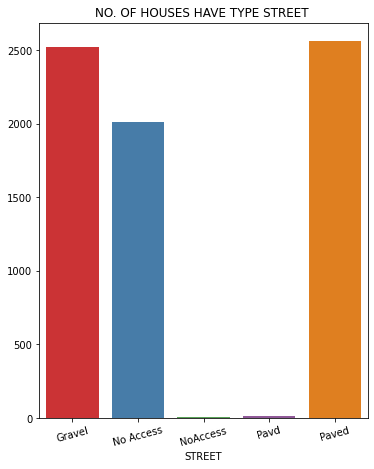

In [21]:
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES HAVE TYPE STREET ')
sns.barplot(x=a1.index,y=a1.values,data=df,palette="Set1")
plt.show()

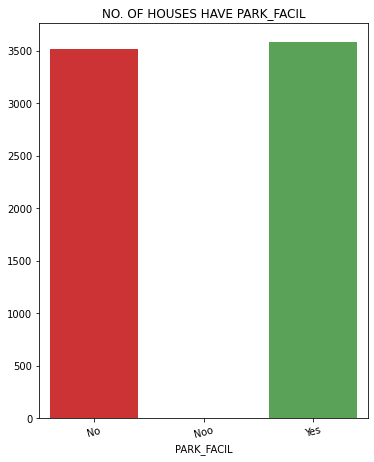

In [22]:
plt.figure(figsize=(20,16))
plt.subplot(231)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES HAVE PARK_FACIL')
sns.barplot(x=a2.index,y=a2.values,data=df,color='green',palette="Set1")
plt.show()

**This provides information on street access with proper roads and parking facilities**

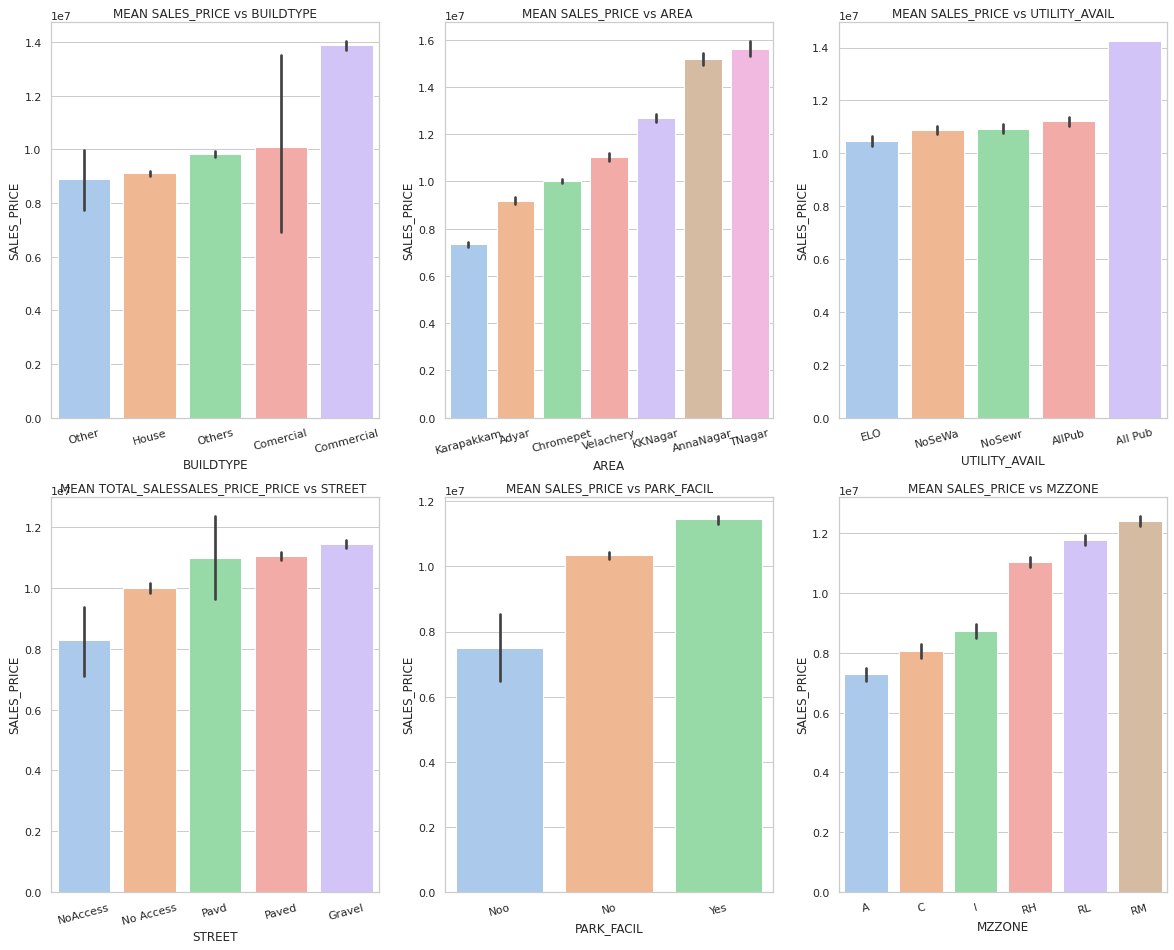

In [23]:
sns.set_theme(style="whitegrid", palette="pastel",)
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs BUILDTYPE')
plt.subplot(232)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs AREA ')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs UTILITY_AVAIL')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN TOTAL_SALESSALES_PRICE_PRICE vs STREET ')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs PARK_FACIL')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE vs MZZONE')
plt.show()

*Commercial buildings have the higher sales price and provide better profits

*T nagar tend to have the higher sales price

*Needed to provide road facility and sewage management cent percent.



**SUBPLOT**

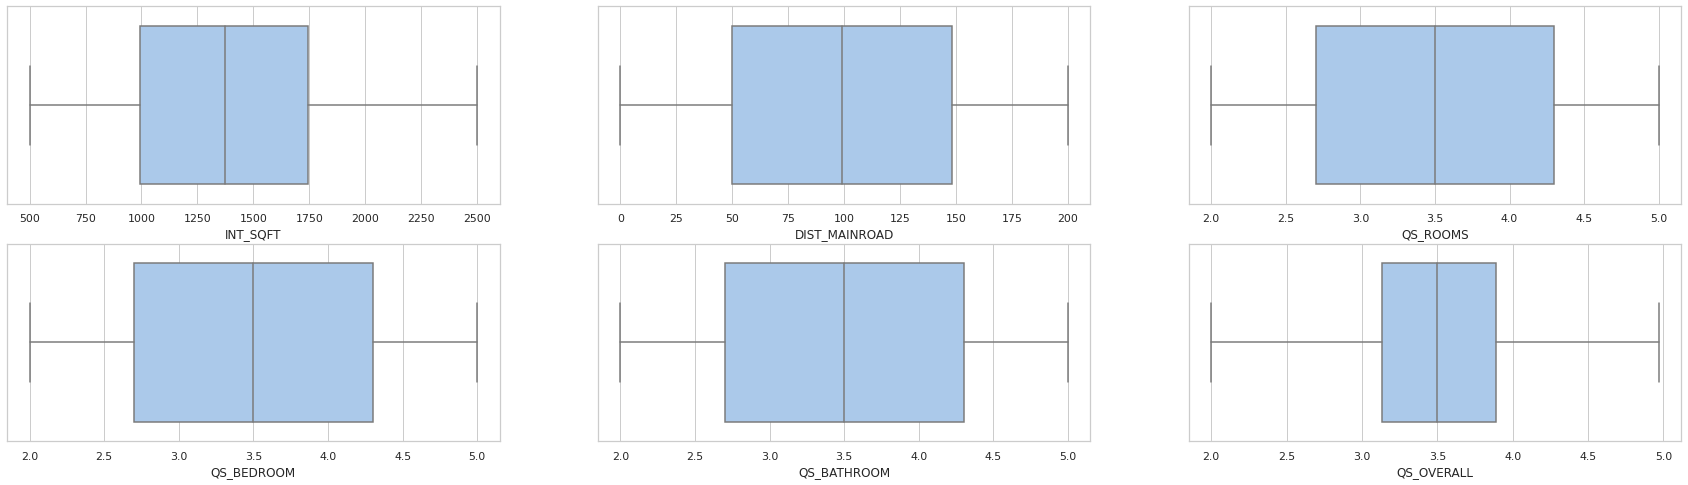

In [24]:
fig, axs = plt.subplots(2,3,figsize=(30,8))

columnsN = ['INT_SQFT','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','QS_OVERALL']

for col, ax in zip(columnsN,axs.flatten()):
  sns.boxplot(x=df[col], ax=ax)

**No variables have any outliers as visible on the box plots**

**BOXPLOT**

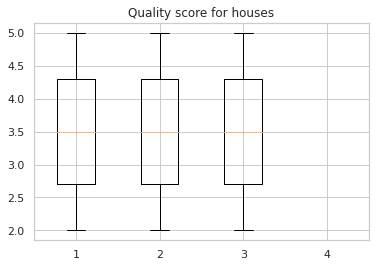

In [25]:
ax = plt.figure().add_subplot(111)
ax.set_title('Quality score for houses')
bp = ax.boxplot([df['QS_BEDROOM'],df['QS_ROOMS'],df['QS_BATHROOM'],df['QS_OVERALL']])

**SCATTER MATRIX**

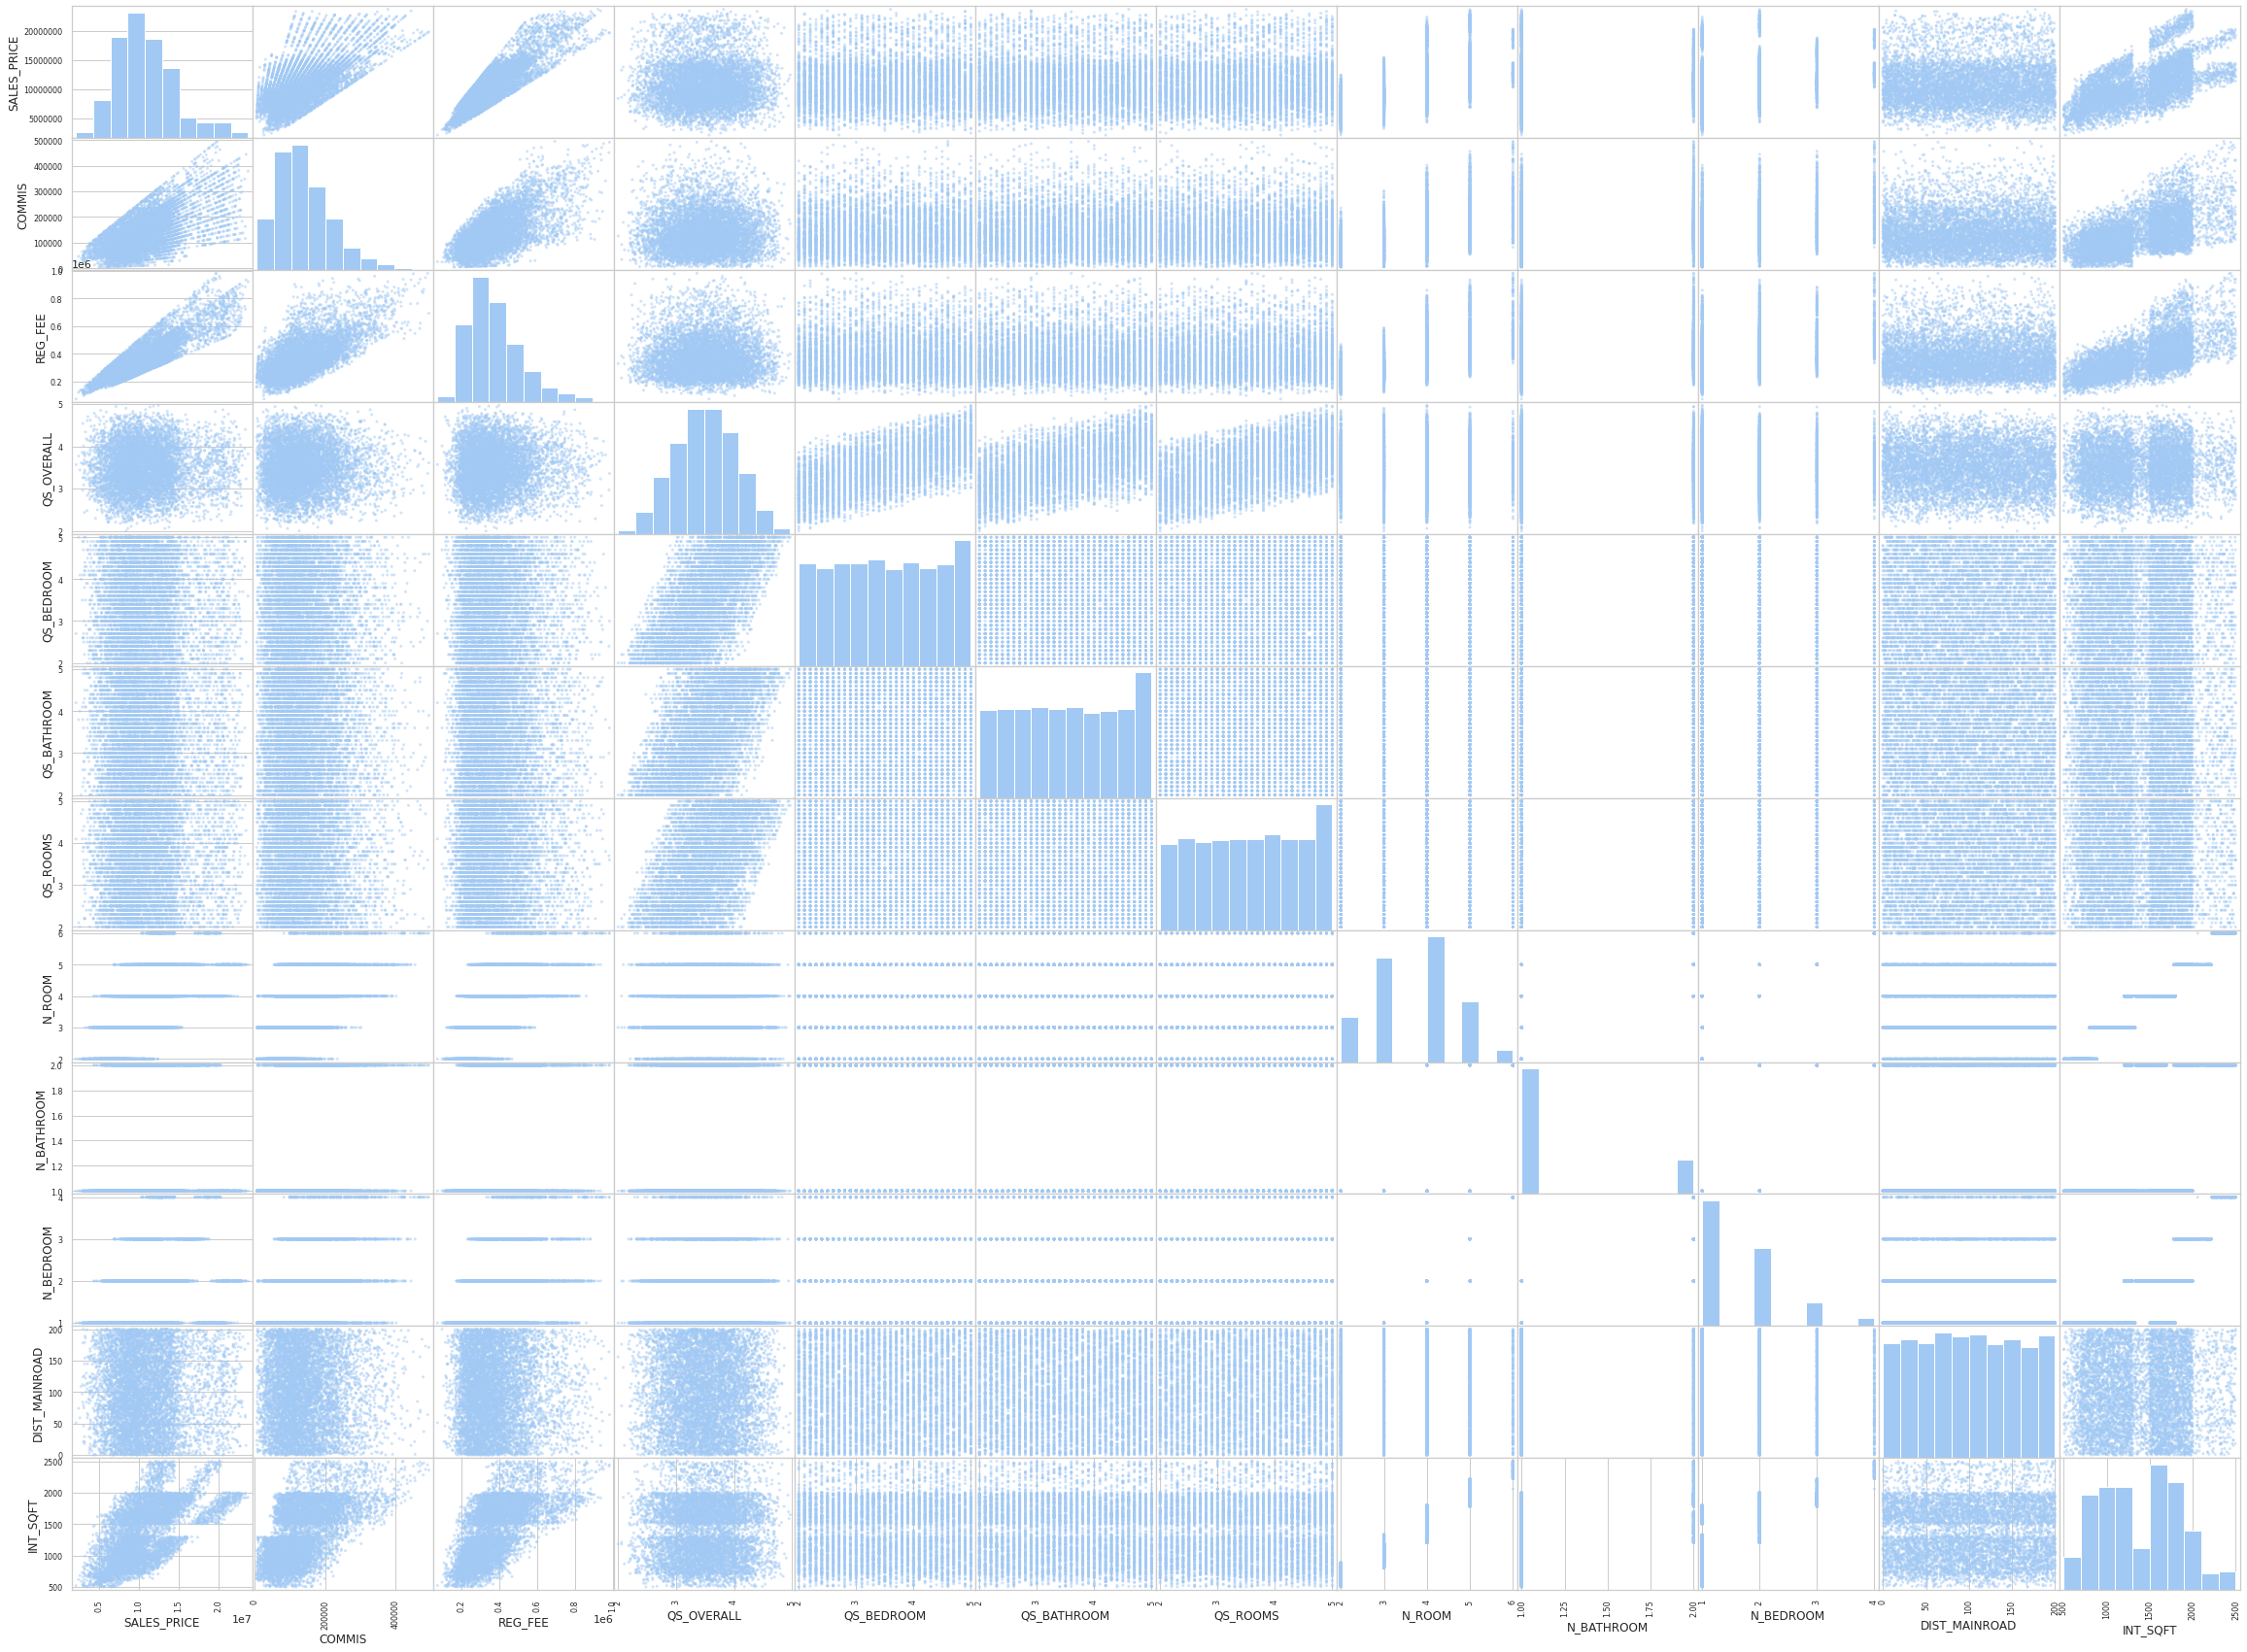

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(df.iloc[:,-1:0:-1],figsize=(40,30))
plt.show()

**Area (outliners) vs Sales**

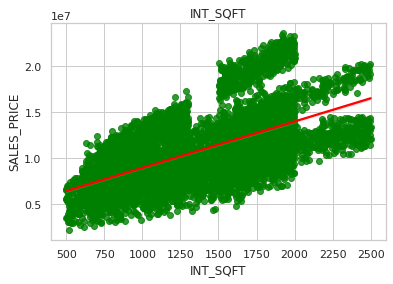

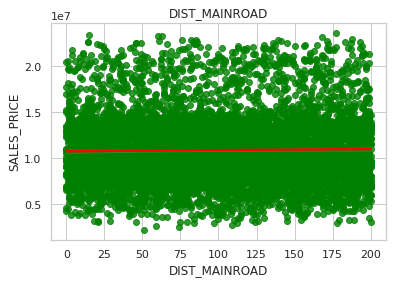

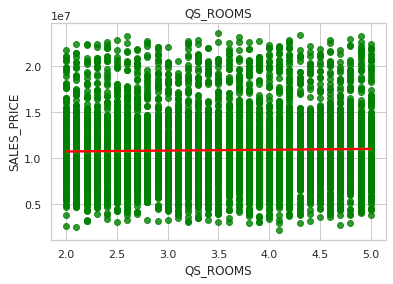

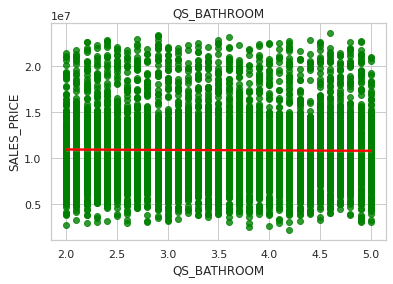

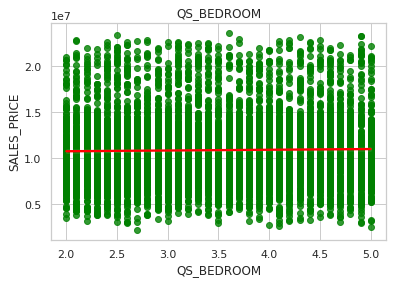

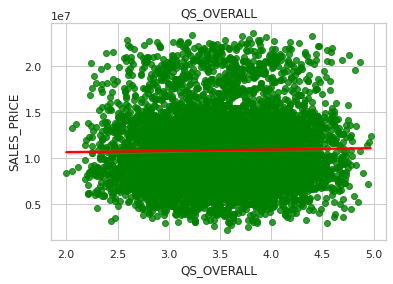

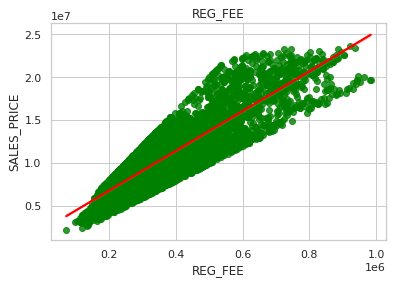

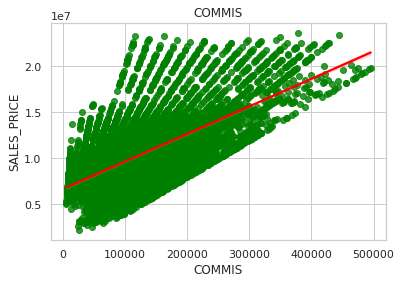

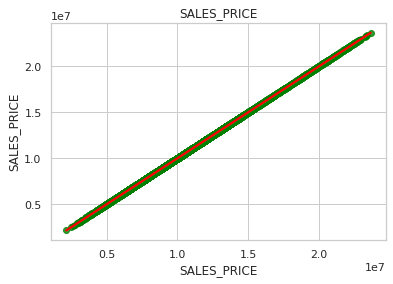

In [27]:
for i in df.columns:
  if df[i].dtype in ['int64','float']:
    if df[i].nunique()>10:
      # use regplot
      sns.regplot(x = i,y = 'SALES_PRICE',scatter_kws={"color": "green"}, line_kws={"color": "red"},data = df)
      plt.title(i)
      plt.show()

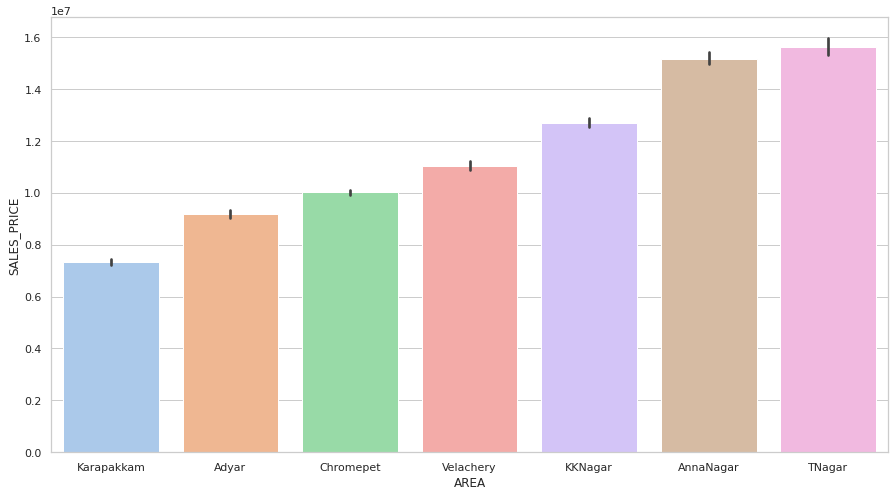

In [28]:
plt.figure(figsize=(15,8))
AREA_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
ax = sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = AREA_order)

<Figure size 1080x576 with 0 Axes>

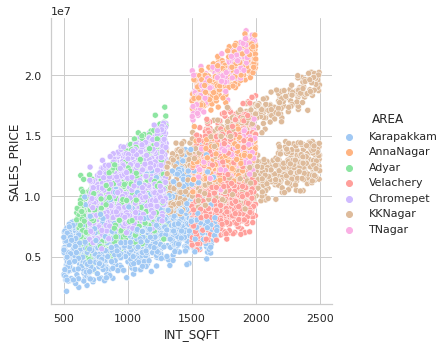

In [29]:
plt.figure(figsize=(15,8))
ax = sns.relplot(x='INT_SQFT',y='SALES_PRICE',hue='AREA',data=df)

**HISTOGRAM**

Text(0.5, 0, 'Sales')

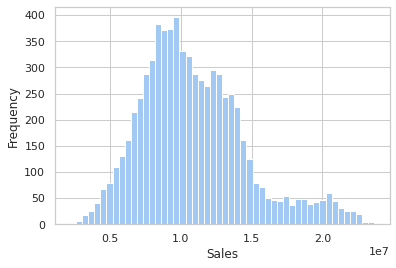

In [30]:
df['SALES_PRICE'].plot.hist(bins = 50)
plt.xlabel('Sales', fontsize=12)

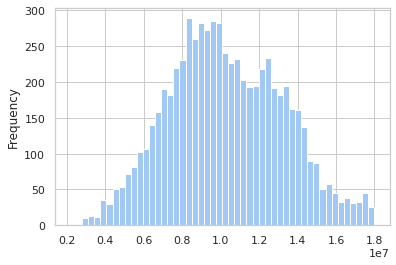

In [31]:
(df['SALES_PRICE'].loc[df['SALES_PRICE']<18000000]).plot.hist(bins=50)

Text(0.5, 0, 'Area in sq feet')

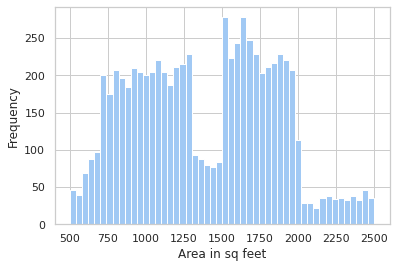

In [32]:
df['INT_SQFT'].plot.hist(bins = 50)
plt.xlabel('Area in sq feet', fontsize=12)

<Figure size 1080x576 with 0 Axes>

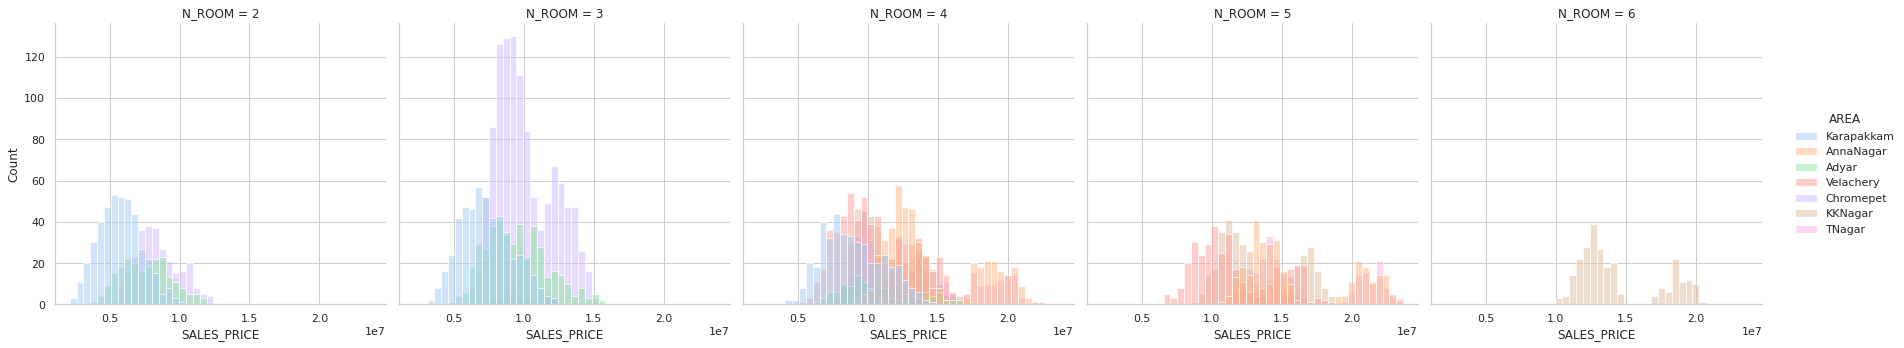

In [33]:
plt.figure(figsize=(15,8))
ax = sns.displot(x='SALES_PRICE',col='N_ROOM',hue='AREA',data=df)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


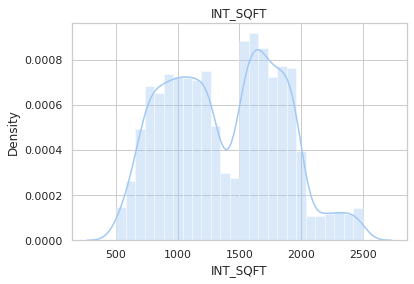

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


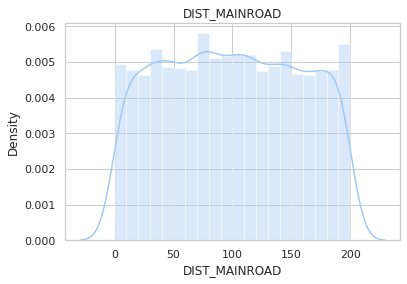

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


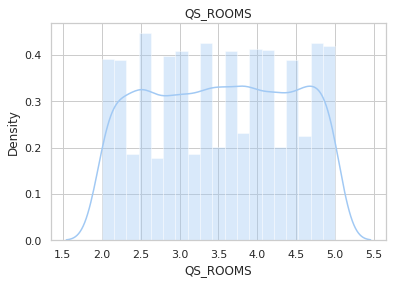

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


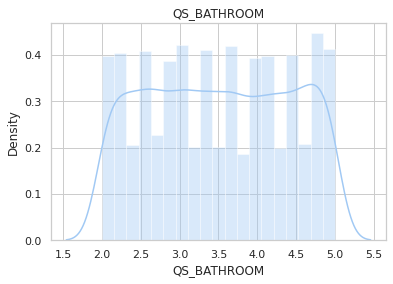

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


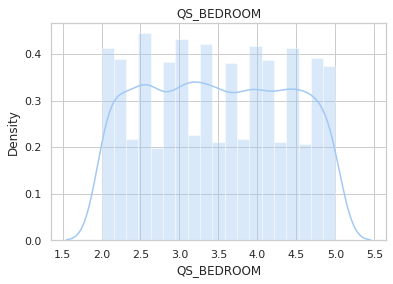

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


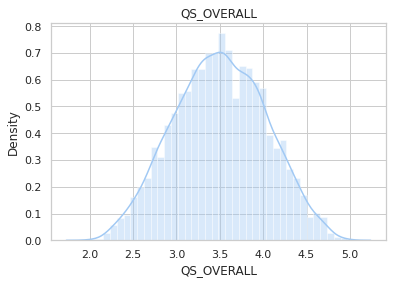

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


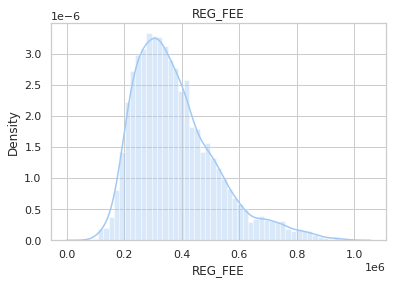

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


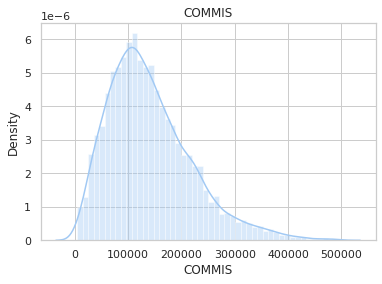

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


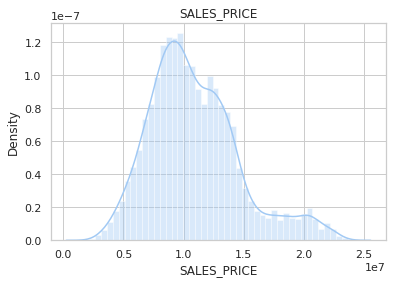

In [34]:
for i in df.columns:
  if df[i].dtype in ['int64','float']:
    if df[i].nunique()>10:
      sns.distplot(df[i])
      plt.title(i)
      plt.show()

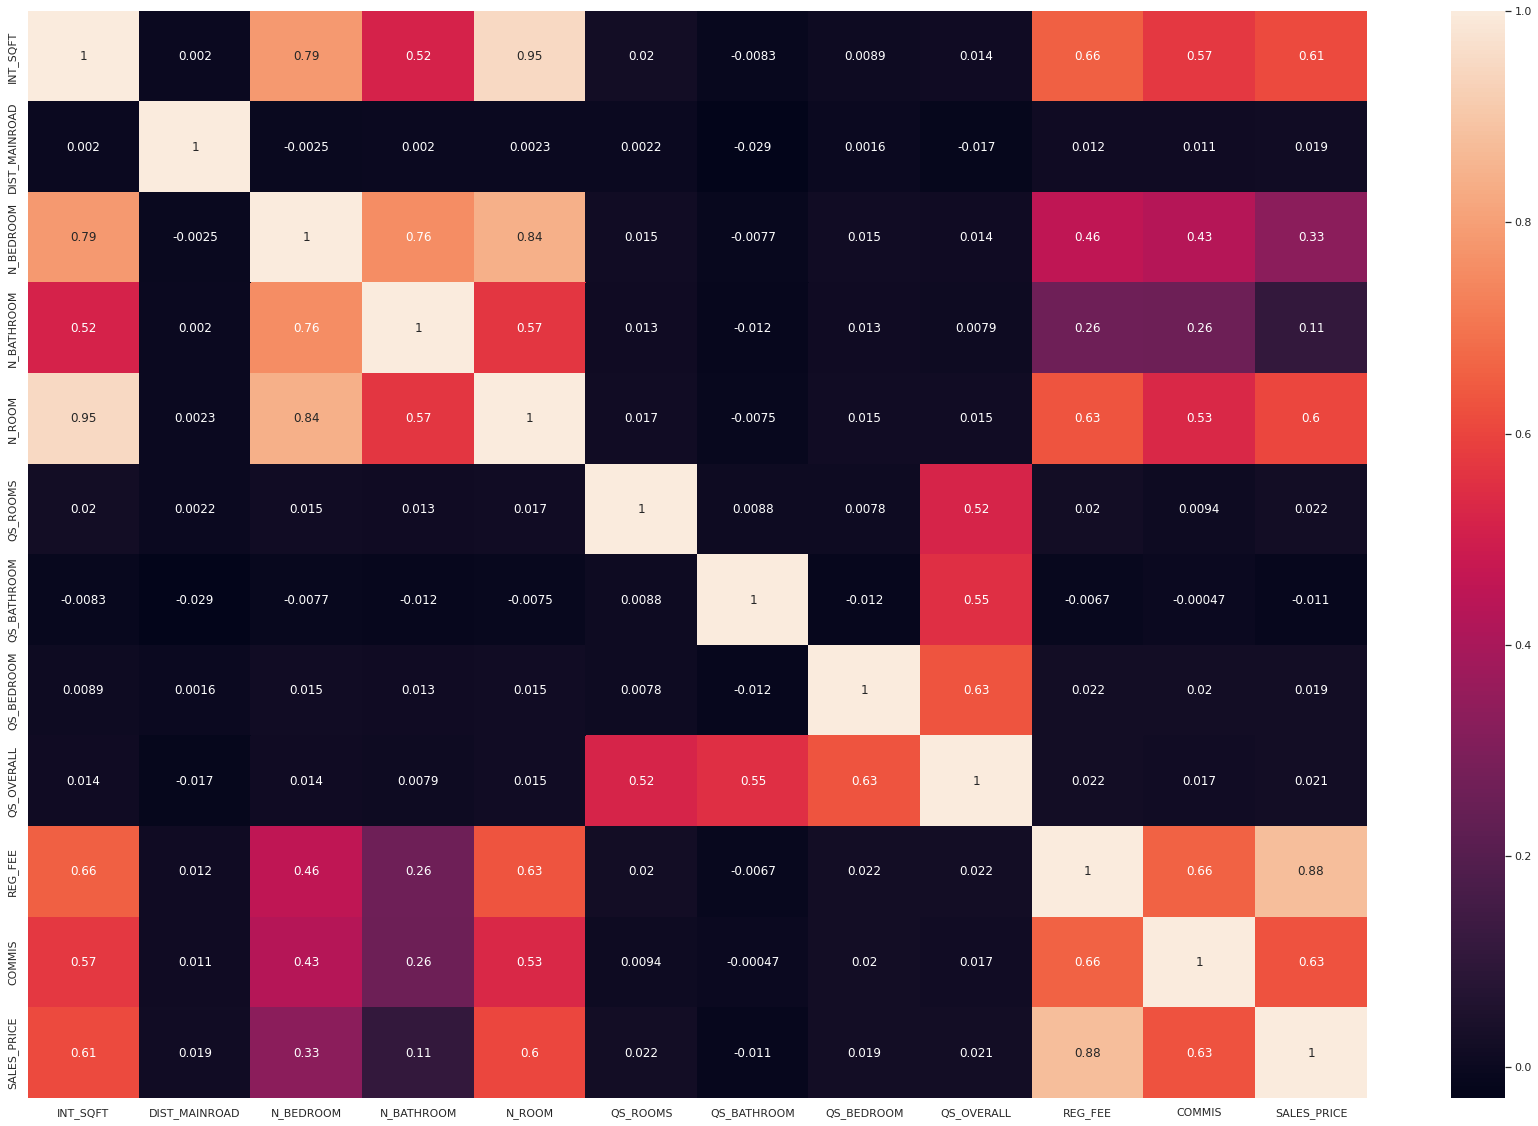

In [35]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)

**SPLITTING DATA**

In [36]:
X= np.array(df.drop(['SALES_PRICE'],axis=1))
y= np.array(df['SALES_PRICE'])

In [37]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=5)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((5331, 21), (1778, 21), (5331,), (1778,))

In [39]:
from sklearn.model_selection import train_test_split
X=df[['INT_SQFT','N_ROOM','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','UTILITY_AVAIL','DATE_BUILD']].values.reshape(-1,9)
Y=df['SALES_PRICE']
#X_val=df[['AGE']].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

X_trainP=pd.DataFrame(X_train,columns=['INT_SQFT','N_ROOM','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','UTILITY_AVAIL','DATE_BUILD'])
X_trainP['INT_SQFT']=scaler.fit_transform(X_trainP['INT_SQFT'].values.reshape(-1,1))
X_testP=pd.DataFrame(X_test,columns=['INT_SQFT','N_ROOM','AREA','N_BEDROOM','PARK_FACIL','STREET','MZZONE','UTILITY_AVAIL','DATE_BUILD'])
X_testP['INT_SQFT']=scaler.fit_transform(X_testP['INT_SQFT'].values.reshape(-1,1))

In [41]:
X_test=X_testP.values.reshape(-1,9)
X_train=X_trainP.values.reshape(-1,9)

In [42]:
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411   AnnaNagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [43]:
df.tail()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
7104  P03834  Karapakkam       598  03-01-2011             51        1.0   
7105  P10000   Velachery      1897  08-04-2004             52        3.0   
7106  P09594   Velachery      1614  25-08-2006            152        2.0   
7107  P06508  Karapakkam       787  03-08-2009             40        1.0   
7108  P09794   Velachery      1896  13-07-2005            156        3.0   

      N_BATHROOM  N_ROOM    SALE_COND PARK_FACIL  ... UTILITY_AVAIL  \
7104         1.0       2      AdjLand         No  ...           ELO   
7105         2.0       5       Family        Yes  ...        NoSeWa   
7106         1.0       4  Normal Sale         No  ...        NoSeWa   
7107         1.0       2      Partial        Yes  ...           ELO   
7108         2.0       5      Partial        Yes  ...           ELO   

         STREET MZZONE QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  \
7104  No Access     RM      3.0         2.2         2.4        2.52   208767   
7105  No Access     RH      3.6         4.5         3.3        3.92   346191   
7106     Gravel      I      4.3         4.2         2.9        3.84   317354   
7107      Paved     RL      4.6         3.8         4.1        4.16   425350   
7108      Paved      I      3.1         3.5         4.3        3.64   349177   

      COMMIS  SALES_PRICE  
7104  107060      5353000  
7105  205551     10818480  
7106  167028      8351410  
7107  119098      8507000  
7108   79812      9976480  

[5 rows x 22 columns]

**RESULTS**

Price of the property changes due to various factors.

**Top factors are:**

1) Based on Type of the property i.e., Commercial, House or others.

2) Based on the Geographical position of the property (Zone and location).

3) The price varies based on road facilities and availability of Parking.

**Suggestions to Real estate agents:**

**Profit can be increased by considering the following factors:**

1) It is recommendeded to construct a commercial bulding rather than residential building or others.

2) Constructing buildings in T Nagar, Anna Nagar and K K Nagar can result in higher profit.

3) It is highly recommended to construct buildings with parking facility.

4) The road should be paved properly.

5) The property should have all essential facilites nearby.

